In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import dot_classifier
reload(dot_classifier)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)

x = np.arange(4)
K = thomas_fermi.create_K_matrix(x,E_scale=1e-3)

battery_ind = []

V = np.array([5e-3,2e-3,2e-3,5e-3])
mu_l = (10e-3,10e-3+0.1e-3)
    
graph_model = (10,1)
battery_weight = 1000
kT = 20e-6
physics = (x,V,K,mu_l,battery_weight,kT)

G = markov_graph.generate_graph(graph_model, physics)
battery_ind = markov_graph.get_battery_nodes(G)

I_vec = markov_graph.get_current(G,battery_ind)

In [7]:
I_vec

(2.3692084186936407e-05+0j)

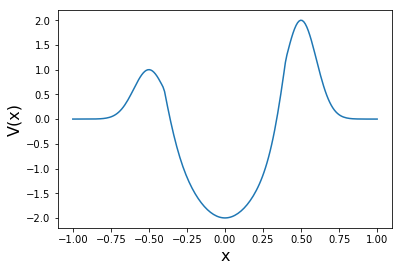

In [41]:
def gauss(x,mean,sigma,peak):
    return peak*np.exp(-(x-mean)**2/(2*sigma**2))

def single_dot_V_x(x,d,b1,b2):
    '''
    Input:
    x : 1d linear grid
    d : dot potential paramters
    b1,b2 : barrier parameters:
    
    Output:
    V(x) : potential landscape 
    
    The dot potential is modelled as a parabolic well with depth V_d and 
    size dot_size. The two barriers are modelled as Gaussaians. The 
    parameters are passed as the following tuples.
    
     d = (dot_size,V_d)
    b1 = (V_b1,mu_b1,sigma_b1)
    b2 = (V_b2,mu_b2,sigma_b2)
    
    Note: It is responsiblity of the caller to ensure that the dot_size is
    within the range of x.
    '''
    
    (dot_size,V_d) = d
    (V_b1,mu_b1,sigma_b1) = b1
    (V_b2,mu_b2,sigma_b2) = b2
    
    V = np.zeros(len(x))

    # dot potential
    k = 2*V_d/(dot_size**2)
    # outside the dot, the parabolic potential should be zero, faster 
    # way to ensure that rather than iterating with an if condition
    x_dot = np.array(map(lambda x:x if np.abs(x) < dot_size else dot_size,x))
    V += 0.5*k*x_dot**2 - V_d
    
    # barriers
    V += gauss(x,mu_b1,sigma_b1,V_b1)
    V += gauss(x,mu_b2,sigma_b2,V_b2)
    
    return V

N_grid = 200
x = np.linspace(-1,1,N_grid)

d = (0.4,2)
b1 = (2,0.5,0.1)
b2 = (1,-0.5,0.1)

V = single_dot_V_x(x,d,b1,b2)

plt.plot(x,V)
plt.xlabel('x',fontsize=16)
plt.ylabel('V(x)',fontsize=16)

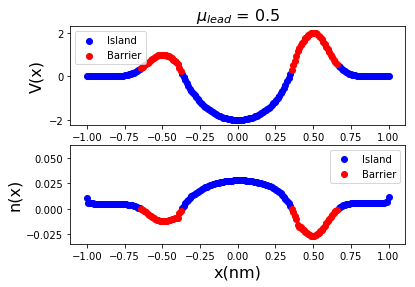

In [42]:
import sys
sys.path.append('/Users/ssk4/quantum-ml/dot_classifier_tf/')
import classify_tf
reload(classify_tf)

K = classify_tf.create_K_matrix(x,E_scale=0.1,sigma=0.5*(x[1] - x[0]))
#K = np.identity(len(x))
mu = 0.5
n = classify_tf.solve_thomas_fermi_fixed_mu(x,V,K,mu)


def classify_n(n,tol=1e-1):
    if n < 0:
        return 'b'
    else:
        return 'd'
mask = map(classify_n,n)

islands = np.where(n > 0)
barriers = np.where(n < 0)

fig,axarr = plt.subplots(2)
axarr[0].scatter(x[islands],V[islands],color='b')
axarr[0].scatter(x[barriers],V[barriers],color='r')
axarr[0].legend(('Island','Barrier'))
axarr[0].set_xlabel('x(nm)',fontsize=16)
axarr[0].set_ylabel('V(x)',fontsize=16)
axarr[0].set_title(r'$\mu_{lead}$ = ' + str(mu),fontsize=16)

ar = axarr[1].scatter(x[islands],n[islands],color='b')
ar = axarr[1].scatter(x[barriers],n[barriers],color='r')
axarr[1].legend(('Island','Barrier'))
axarr[1].set_xlabel('x(nm)',fontsize=16)
axarr[1].set_ylabel('n(x)',fontsize=16)


In [40]:
print mask

['d', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd']